In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
df_cont = pd.read_csv('Data/Final_no_suppress.txt', sep='\t')
df_cont.head()

,npi,nppes_provider_gender,specialty_description,medicare_prvdr_enroll_status,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,total_claim_count_ge65,...,beneficiary_average_risk_score,EXCLYear,REINYear,excl_type,exclusion_flag,state,nppes_credentials,total_30_day_per_claim,drug_cost_per_claim,day_supply_per_claim
0,1770515488,1,Physical Medicine,3,629.0,654.0,44696.90,15538.0,204.0,481.0,...,1.4215,NaN,NaN,NaN,0,NY,Optometrist,1.039746,71.060254,24.702703
1,1174060784,2,Nurse,3,673.0,727.0,25846.34,19758.0,65.0,526.0,...,1.1115,NaN,NaN,NaN,0,NY,Nurse,1.080238,38.404666,29.358098
2,1265525273,1,Optometry/Ophthalmology,3,9103.0,10068.9,334417.10,257126.0,1481.0,7676.0,...,1.6575,NaN,NaN,NaN,0,AT,Medical Doctor,1.106108,36.737021,28.246292
3,1306821152,1,Cardiologist,3,1359.0,3290.3,89341.59,98467.0,288.0,1199.0,...,1.5218,NaN,NaN,NaN,0,NY,Medical Doctor,2.421118,65.740684,72.455482
4,1134244007,2,Internal Medicine,3,53.0,53.2,3391.01,579.0,25.0,48.0,...,1.9840,NaN,NaN,NaN,0,FL,Medical Doctor,1.003774,63.981321,10.924528


In [3]:
df_cont.columns

Index(['npi', 'nppes_provider_gender', 'specialty_description',
       'medicare_prvdr_enroll_status', 'total_claim_count',
       'total_30_day_fill_count', 'total_drug_cost', 'total_day_supply',
       'bene_count', 'total_claim_count_ge65', 'total_30_day_fill_count_ge65',
       'total_drug_cost_ge65', 'total_day_supply_ge65', 'bene_count_ge65',
       'brand_claim_count', 'brand_drug_cost', 'generic_claim_count',
       'generic_drug_cost', 'other_claim_count', 'other_drug_cost',
       'mapd_claim_count', 'mapd_drug_cost', 'pdp_claim_count',
       'pdp_drug_cost', 'lis_claim_count', 'lis_drug_cost',
       'nonlis_claim_count', 'nonlis_drug_cost', 'opioid_claim_count',
       'opioid_drug_cost', 'opioid_day_supply', 'opioid_bene_count',
       'opioid_prescriber_rate', 'la_opioid_claim_count',
       'la_opioid_drug_cost', 'la_opioid_day_supply', 'la_opioid_bene_count',
       'la_opioid_prescriber_rate', 'antibiotic_claim_count',
       'antibiotic_drug_cost', 'antibiotic_bene_c

In [4]:
df_suppress = pd.read_csv('Data/Final_Suppress_Features.txt', sep='\t')
df_suppress.head()

,npi,nppes_provider_gender,specialty_description,medicare_prvdr_enroll_status,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,ge65_suppress_flag,...,exclusion_flag,state,nppes_credentials,total_30_day_per_claim,drug_cost_per_claim,day_supply_per_claim,female_count,male_count,nondual_count,dual_count
0,1770515488,1,Physical Medicine,3,629.0,654.0,44696.90,15538.0,204.0,1,...,0,NY,Optometrist,1.039746,71.060254,24.702703,2,2,2,2
1,1174060784,2,Nurse,3,673.0,727.0,25846.34,19758.0,65.0,1,...,0,NY,Nurse,1.080238,38.404666,29.358098,2,2,2,2
2,1265525273,1,Optometry/Ophthalmology,3,9103.0,10068.9,334417.10,257126.0,1481.0,1,...,0,AT,Medical Doctor,1.106108,36.737021,28.246292,2,2,2,2
3,1306821152,1,Cardiologist,3,1359.0,3290.3,89341.59,98467.0,288.0,1,...,0,NY,Medical Doctor,2.421118,65.740684,72.455482,2,2,2,2
4,1134244007,2,Internal Medicine,3,53.0,53.2,3391.01,579.0,25.0,3,...,0,FL,Medical Doctor,1.003774,63.981321,10.924528,1,1,1,1


In [5]:
#Dropping all columns that are not possible features or the outcome or which are categorical
suppress = ['ge65_suppress_flag', 'bene_count_ge65_suppress_flag', 'brand_suppress_flag','generic_suppress_flag', 
            'other_suppress_flag', 'mapd_suppress_flag', 'pdp_suppress_flag', 'lis_suppress_flag', 
            'nonlis_suppress_flag', 'antipsych_ge65_suppress_flag', 'antipsych_bene_ge65_suppress_flg', 'exclusion_flag']
df_suppress_sub = df_suppress[suppress]
df_suppress_sub.shape

(5000, 12)

In [6]:
features_suppress = df_suppress_sub.drop(columns = ['exclusion_flag']).columns
X = df_suppress_sub[features_suppress].values
y = df_suppress_sub['exclusion_flag'].values

C:\Users\Me\Anaconda3\lib\site-packages\yellowbrick\features\radviz.py:199: RuntimeWarning: invalid value encountered in true_divide
  xy = (s * row_).sum(axis=0) / row.sum()


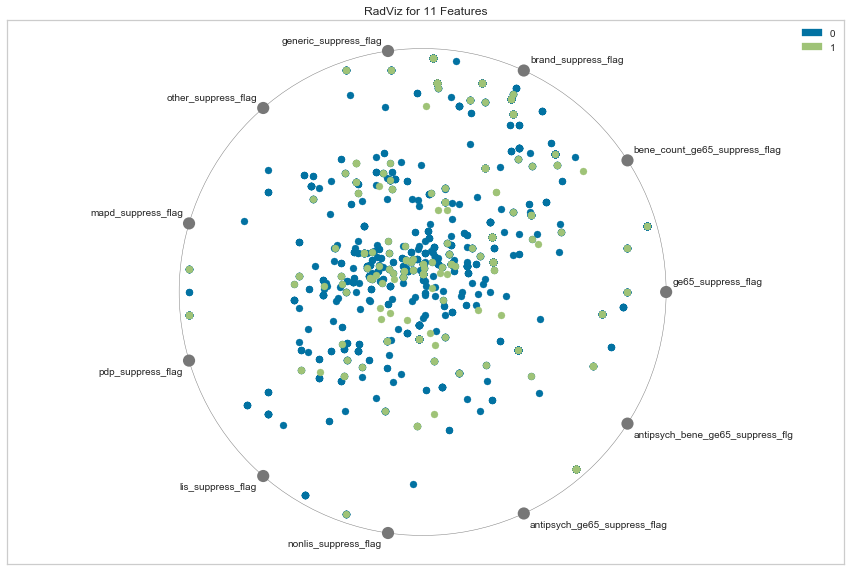

In [7]:
from yellowbrick.features import RadViz

# Specify the target classes
classes = ['0', '1']

# Instantiate the visualizer
visualizer = RadViz(classes=classes, features=features_suppress, size=(1080, 720))

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Draw the data

In [8]:
#Dropping all columns that are not possible features or the outcome or which are categorical
df_cont_features = df_cont.drop(columns=['npi', 'EXCLYear', 'REINYear', 'excl_type', 'specialty_description', 'state', 'nppes_credentials'])
df_cont_features.shape

(5000, 52)

## Feature Selection

There is the possibility of 51 continuous variable features. Most likely all of these features are not strong predictors of the outcome (exclusion from Medicare) so will most likely want to filter these features down before running our final model. Will start looking at all together by using Radviz.

In [9]:
#Selecting target column separate from features for the non suppression flag data
features_1 = df_cont_features.drop(columns = ['exclusion_flag']).columns
X = df_cont_features[features_1].values
y = df_cont_features['exclusion_flag'].values

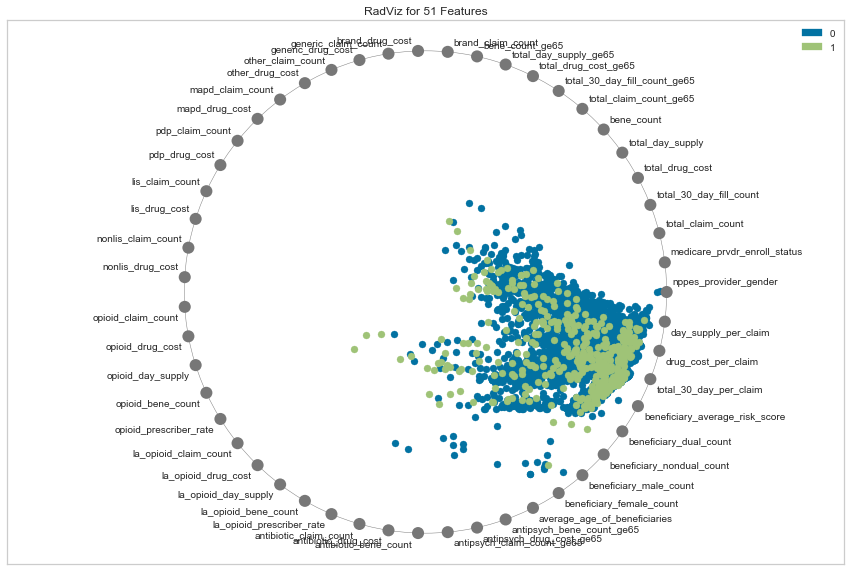

In [10]:
from yellowbrick.features import RadViz

# Specify the target classes
classes = ['0', '1']

# Instantiate the visualizer
visualizer = RadViz(classes=classes, features=features_1, size=(1080, 720))

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Draw the data

## Regularizations

Looks like too much noise is included so will look at the three regularization techniques

In [11]:
features_3 = df_cont_features[features_1]
labels = df_cont_features['exclusion_flag']

In [12]:
#Using Lasso Regularization
model = Lasso(tol=.5)
model.fit(features_3, labels)
print(list(zip(features_3, model.coef_.tolist())))

[('nppes_provider_gender', -0.0), ('medicare_prvdr_enroll_status', -0.0), ('total_claim_count', 3.6419576510541697e-06), ('total_30_day_fill_count', -3.484571847357905e-07), ('total_drug_cost', 1.83093052356338e-08), ('total_day_supply', -5.079023954552747e-09), ('bene_count', -2.4353711929577782e-05), ('total_claim_count_ge65', -6.662319160313408e-06), ('total_30_day_fill_count_ge65', 2.1654149025216033e-10), ('total_drug_cost_ge65', -5.796188111201144e-10), ('total_day_supply_ge65', 2.9778943140122248e-08), ('bene_count_ge65', -5.1189519382236174e-05), ('brand_claim_count', 1.514497549759643e-05), ('brand_drug_cost', -6.670095098141217e-09), ('generic_claim_count', 5.708043399748618e-06), ('generic_drug_cost', 2.444224463726056e-07), ('other_claim_count', -0.0), ('other_drug_cost', -1.666805727992782e-07), ('mapd_claim_count', -3.7544455343521216e-06), ('mapd_drug_cost', -1.7004178184658346e-08), ('pdp_claim_count', -5.237313847527811e-06), ('pdp_drug_cost', -8.117022302781064e-09), 

In [13]:
#Applying Ridge Regression
model = Ridge()
model.fit(features_3, labels)
print(list(zip(features_3, model.coef_.tolist())))

[('nppes_provider_gender', -0.09399470977986771), ('medicare_prvdr_enroll_status', -0.21486860465286123), ('total_claim_count', -0.0031975862302248983), ('total_30_day_fill_count', 8.791529477391022e-05), ('total_drug_cost', -2.848079850303465e-07), ('total_day_supply', -2.5844029863010734e-06), ('bene_count', 0.0002916778307040541), ('total_claim_count_ge65', -3.772102505496198e-05), ('total_30_day_fill_count_ge65', -5.045913388950092e-05), ('total_drug_cost_ge65', 1.283920604025338e-07), ('total_day_supply_ge65', 1.6687077901497382e-06), ('bene_count_ge65', -0.0001678721697138786), ('brand_claim_count', 0.0060548726106313365), ('brand_drug_cost', 3.903337315763845e-09), ('generic_claim_count', 0.006034492071418401), ('generic_drug_cost', 2.467614496658376e-07), ('other_claim_count', 0.005830696438661592), ('other_drug_cost', 2.6538493467772213e-06), ('mapd_claim_count', 0.002327507265088414), ('mapd_drug_cost', -2.991223580322964e-08), ('pdp_claim_count', 0.0023273287219369135), ('pd

In [14]:
#Applying ElasticNet
model = ElasticNet(tol=.5)
model.fit(features_3, labels)
print(list(zip(features_3, model.coef_.tolist())))

[('nppes_provider_gender', -0.0), ('medicare_prvdr_enroll_status', -0.0), ('total_claim_count', 4.453717379575055e-06), ('total_30_day_fill_count', -5.625842422087969e-07), ('total_drug_cost', 1.4022888950458332e-08), ('total_day_supply', -6.7245919506439655e-09), ('bene_count', -5.081823279197558e-05), ('total_claim_count_ge65', -2.8621733833917574e-06), ('total_30_day_fill_count_ge65', -0.0), ('total_drug_cost_ge65', -2.7501892889372954e-09), ('total_day_supply_ge65', 2.2028558272907663e-08), ('bene_count_ge65', -6.6386019692323e-05), ('brand_claim_count', 1.904103904368715e-05), ('brand_drug_cost', -1.176101344426244e-08), ('generic_claim_count', 4.513903913977428e-06), ('generic_drug_cost', 2.0291747691405885e-07), ('other_claim_count', 0.0), ('other_drug_cost', -1.1033063268667046e-06), ('mapd_claim_count', -3.852247228560064e-06), ('mapd_drug_cost', -1.985518400450531e-09), ('pdp_claim_count', -4.234617469011857e-06), ('pdp_drug_cost', -4.515634228049745e-09), ('lis_claim_count',

## Transformer Methods

In [15]:
model = Lasso(tol=.5)
sfm = SelectFromModel(model)
sfm.fit(features_3, labels)
print(list(features_3.iloc[:, sfm.get_support(indices=True)]))

['bene_count', 'bene_count_ge65', 'brand_claim_count', 'opioid_claim_count', 'beneficiary_nondual_count']


In [16]:
model = Ridge()
sfm = SelectFromModel(model)
sfm.fit(features_3, labels)
print(list(features_3.iloc[:, sfm.get_support(indices=True)]))

['nppes_provider_gender', 'medicare_prvdr_enroll_status', 'total_30_day_per_claim']


In [17]:
model = ElasticNet(tol=.5)
sfm = SelectFromModel(model)
sfm.fit(features_3, labels)
print(list(features_3.iloc[:, sfm.get_support(indices=True)]))

['bene_count', 'bene_count_ge65', 'brand_claim_count', 'opioid_claim_count', 'antibiotic_claim_count', 'antipsych_claim_count_ge65', 'beneficiary_nondual_count', 'beneficiary_dual_count']


## Correlations

To ensure we don't miss any strongly correlated features with our outcome, will also include any features with a correlations with our outcome that is greater than 0.1

In [18]:
correlations_spearman = df_cont_features.corr(method='spearman')
cont_corr_spear = correlations_spearman['exclusion_flag']
cont_corr_spear.sort_values()

medicare_prvdr_enroll_status     -0.330336
nppes_provider_gender            -0.165787
average_age_of_beneficiaries     -0.110381
antibiotic_bene_count            -0.074774
antibiotic_claim_count           -0.067849
bene_count_ge65                  -0.062023
beneficiary_nondual_count        -0.045933
antibiotic_drug_cost             -0.038685
bene_count                       -0.030761
opioid_prescriber_rate           -0.024698
nonlis_claim_count               -0.016215
opioid_bene_count                -0.010510
opioid_claim_count                0.000702
beneficiary_female_count          0.002295
total_claim_count_ge65            0.006116
mapd_claim_count                  0.007796
nonlis_drug_cost                  0.013153
total_30_day_fill_count_ge65      0.013815
total_30_day_per_claim            0.014427
opioid_drug_cost                  0.015457
opioid_day_supply                 0.016135
beneficiary_average_risk_score    0.021993
total_drug_cost_ge65              0.022780
beneficiary

In [19]:
#Selecting the features from all three of the transformer exercise, the categorical features not looked at and 
#any correlations greater than absolute value of 0.1 with the outcome variable
keep = ['specialty_description', 'state', 'nppes_credentials', 'bene_count', 'bene_count_ge65', 'brand_claim_count', 
        'opioid_claim_count', 'beneficiary_nondual_count', 'beneficiary_dual_count', 'antipsych_claim_count_ge65', 
        'antibiotic_claim_count', 'day_supply_per_claim', 'generic_drug_cost', 'mapd_drug_cost', 'lis_drug_cost', 
        'nppes_provider_gender', 'medicare_prvdr_enroll_status', 'total_30_day_per_claim', 
        'average_age_of_beneficiaries', 'exclusion_flag']

In [20]:
Model_cont = df_cont[keep]
Model_cont.shape

(5000, 20)

In [21]:
Model_cont.to_csv('Data/Model_cont.txt', sep='\t', index=False)